In [10]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Observation**: There are no missing values in our dataset.

In [5]:
dataset.drop("Serial No.",axis=1,inplace=True)

In [8]:
#Checking for duplicate data
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(500, 8)
(500, 8)


In [34]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

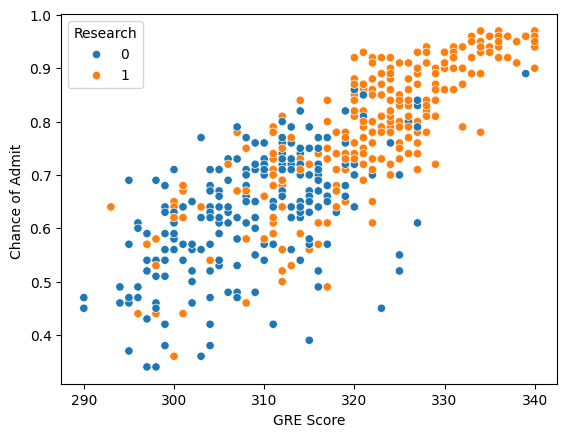

In [36]:
sns.scatterplot(x="GRE Score",y="Chance of Admit ",hue="Research",data=dataset)
plt.show()

**Observation**: There are no duplicate rows in our dataset.

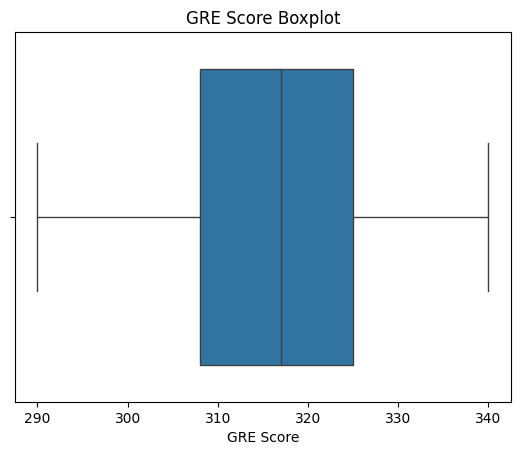

In [13]:
#Checking outliers in our dataset.
sns.boxplot(x="GRE Score",data=dataset)
plt.title("GRE Score Boxplot")
plt.show()

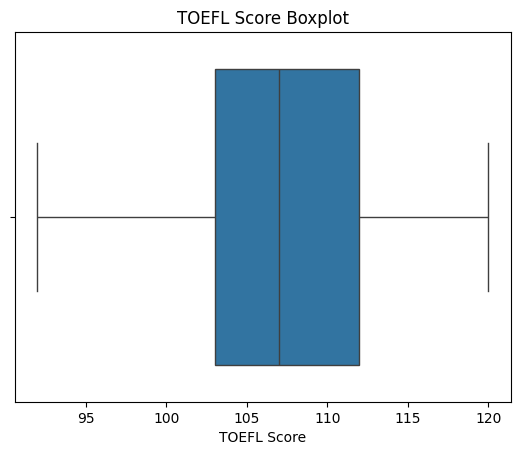

In [16]:
sns.boxplot(x="TOEFL Score",data=dataset)
plt.title("TOEFL Score Boxplot")
plt.show()

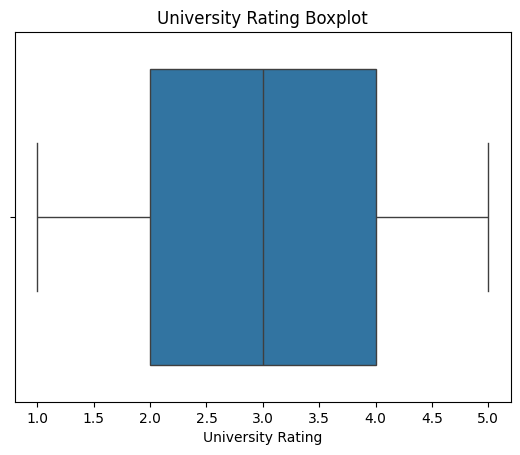

In [17]:
sns.boxplot(x="University Rating",data=dataset)
plt.title("University Rating Boxplot")
plt.show()

**Observation**: There are no outliers in our dataset.

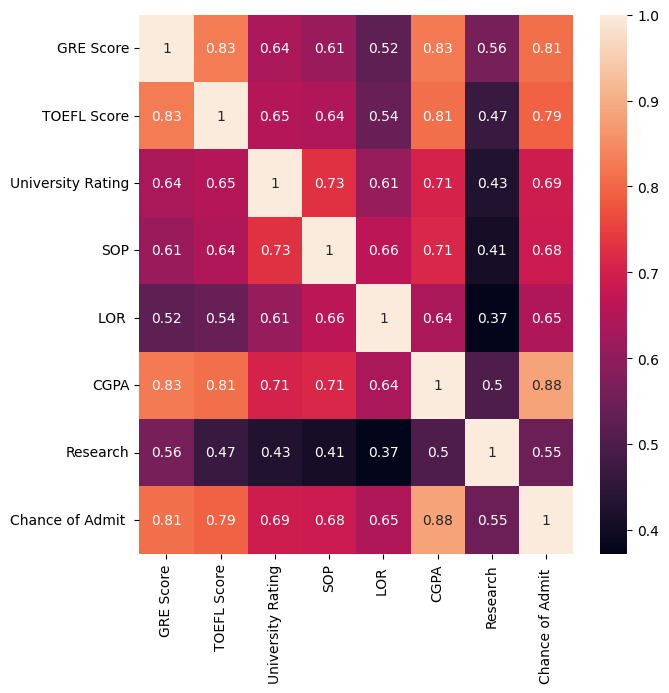

In [38]:
plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [23]:
x = dataset.iloc[:,:-1]
y = dataset[["Chance of Admit "]]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x),columns=x.columns)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error as MAE
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [42]:
model = Sequential()
model.add(Dense(30,activation="relu",input_dim=7))
model.add(Dense(20,activation="relu")) #First Hidden Layer
model.add(Dense(5,activation="relu"))  #Second Hidden Layer
model.add(Dense(1,activation="linear"))     #Output Layer

model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(x_train,y_train,epochs=50)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
r2_test = r2_score(y_test,y_pred_test)
r2_train = r2_score(y_train,y_pred_train)
print("R2 score on test data is: ",r2_test)
print("R2 score on train data is: ",r2_train)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3839
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2353 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0998 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061  
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051  
Epo